## ML 2020 Ex3 Group 38 jupyter notebook

In [18]:
# run this to create train/test data split from raw data
# %run "prepare.py" 7 3

In [19]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%aimport networks
%aimport modules
%aimport utils

In [21]:
from networks import SoftMax, MLP, DAE, ConvNet
from modules import buildModel, invert, test
import torch

Starting at 17:29:22 to build SoftMax model...
epoch: 100
Finished at 17:31:50, duration in sec: 148
Total number of iterations  100 , with accuracy of  0


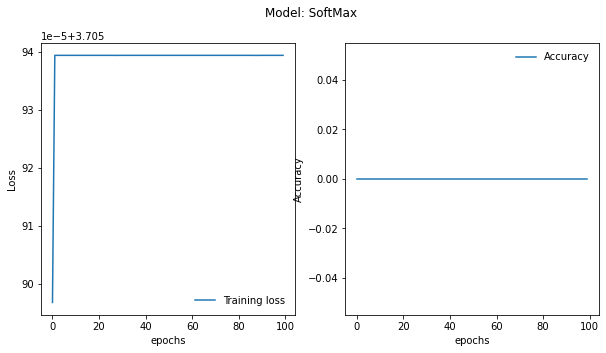

In [22]:
buildModel(SoftMax(), lRate=0.1, plot=True)

Building MLP model...
epoch: 100
epoch: 200
epoch: 300
epoch: 400
epoch: 500


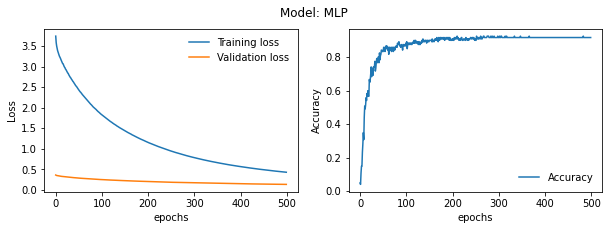

In [64]:
buildModel(MLP(), 0.0001, 500, True)

Starting at 11:55:13 to build DAE model...
Finished at 11:55:20, duration in sec: 6


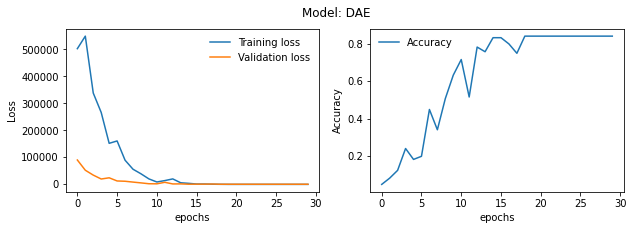

6.959588050842285

In [66]:
buildModel(DAE(), 0.01, 30, True) # placeholder, identical to softmax

Starting at 11:55:27 to build ConvNet model...
Finished at 11:57:41, duration in sec: 133


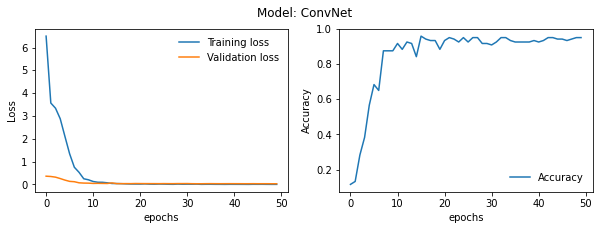

133.9696638584137

In [67]:
buildModel(ConvNet(), 0.001, 50, True)

In [ ]:
invert(SoftMax(), lrMod=0.001, lrInv=0.001, nStep=50, plot=True)

Starting at 17:05:35 to invert SoftMax...


Starting at 12:00:44 to invert DAE...
Finished at 12:00:48, duration in sec: 3


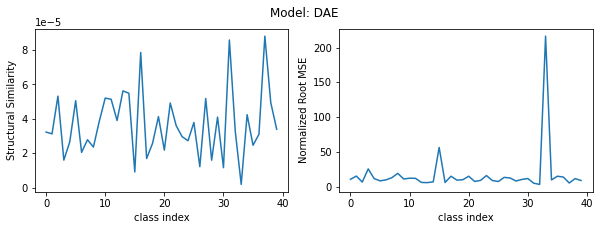

SSM: mean 3.68e-05, std 1.92e-05
NRMSE: mean 1.73e+01, std 3.29e+01


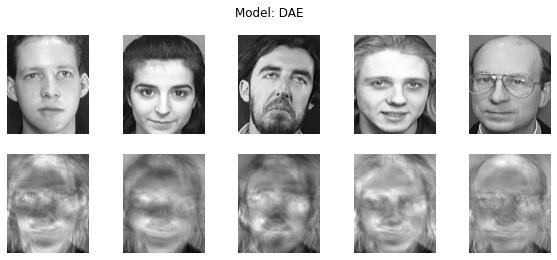

In [9]:
invert(DAE(), 0.001, 0.001, 50, plot=True) # placeholder, identical to softmax

In [15]:
model = SoftMax()
model.load_state_dict(torch.load("./models/SoftMax_model.pt"), strict=False)

<All keys matched successfully>

Starting at 17:13:54 to invert SoftMax...
Finished at 17:13:58, duration in sec: 3


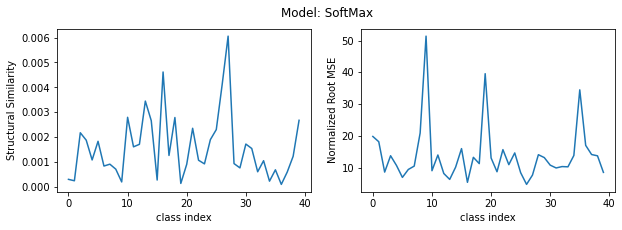

SSM: mean 1.59e-03, std 1.29e-03
NRMSE: mean 1.39e+01, std 8.96e+00


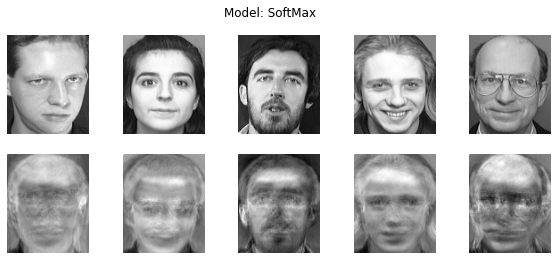

In [16]:
invert(model, 0.0001, 0.01, 20, plot=True)

Starting at 12:02:40 to invert ConvNet...
Finished at 12:03:24, duration in sec: 44


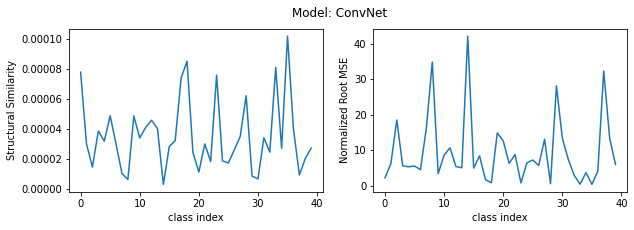

SSM: mean 3.57e-05, std 2.38e-05
NRMSE: mean 9.50e+00, std 9.54e+00


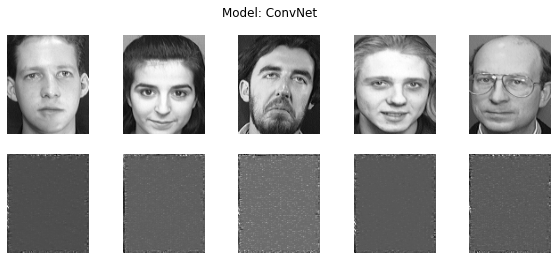

In [11]:
invert(ConvNet(), 0.01, 0.01, 50, plot=True)